In [ ]:
# Task 1: Feature engineering (45 mins)

#  Analyze the provided dataset and select relevant features
# Create new features such as: 
# Interaction features
# Encode categorical variables and handle missing values
# Scale the numerical features using StandardScaler
# Save the processed dataset as "bike_rental_features.csv"

In [5]:

import pandas as pd
df = pd.read_csv("FloridaBikeRentals.csv")
df.info(); df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  01-12-2017                254     0         -5.2        37         2.2   
1  01-12-2017                204     1         -5.5        38         0.8   
2  01-12-2017                173     2         -6.0        39         1.0   
3  01-12-2017                107     3         -6.2        40         0.9   
4  01-12-2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # day-month-year

# 2) Now build a DateTime by adding the Hour
df['DateTime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='h')

# 3) You can now safely extract .dt properties:
df['year']    = df['DateTime'].dt.year
df['month']   = df['DateTime'].dt.month
df['day']     = df['DateTime'].dt.day
df['weekday'] = df['DateTime'].dt.weekday

df['hour']    = df['DateTime'].dt.hour



In [9]:
# interaction feature 
df['temp_humidity'] = df['Temperature'] * df['Humidity']



In [10]:
# Encode categoricals
#    Seasons, Holiday, Functioning Day are object dtypes
df = pd.get_dummies(df,
                    columns=['Seasons','Holiday','Functioning Day'],
                    drop_first=True)

In [11]:
print(df.columns.tolist())


['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'DateTime', 'year', 'month', 'day', 'weekday', 'hour', 'temp_humidity', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes']


In [ ]:
df.drop(columns=['Date', 'DateTime', 'Hour'], inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale numerical columns
num_cols = [
    'Temperature',
    'Humidity',
    'Wind speed',
    'Visibility',
    'Dew point temperature',
    'Solar Radiation',
    'Rainfall',
    'Snowfall',
    'temp_humidity',
]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
# Save final feature set
df.to_csv("bike_rental_features.csv", index=False)
print("Saved bike_rental_features.csv with shape:", df.shape)

Saved bike_rental_features.csv with shape: (8760, 23)


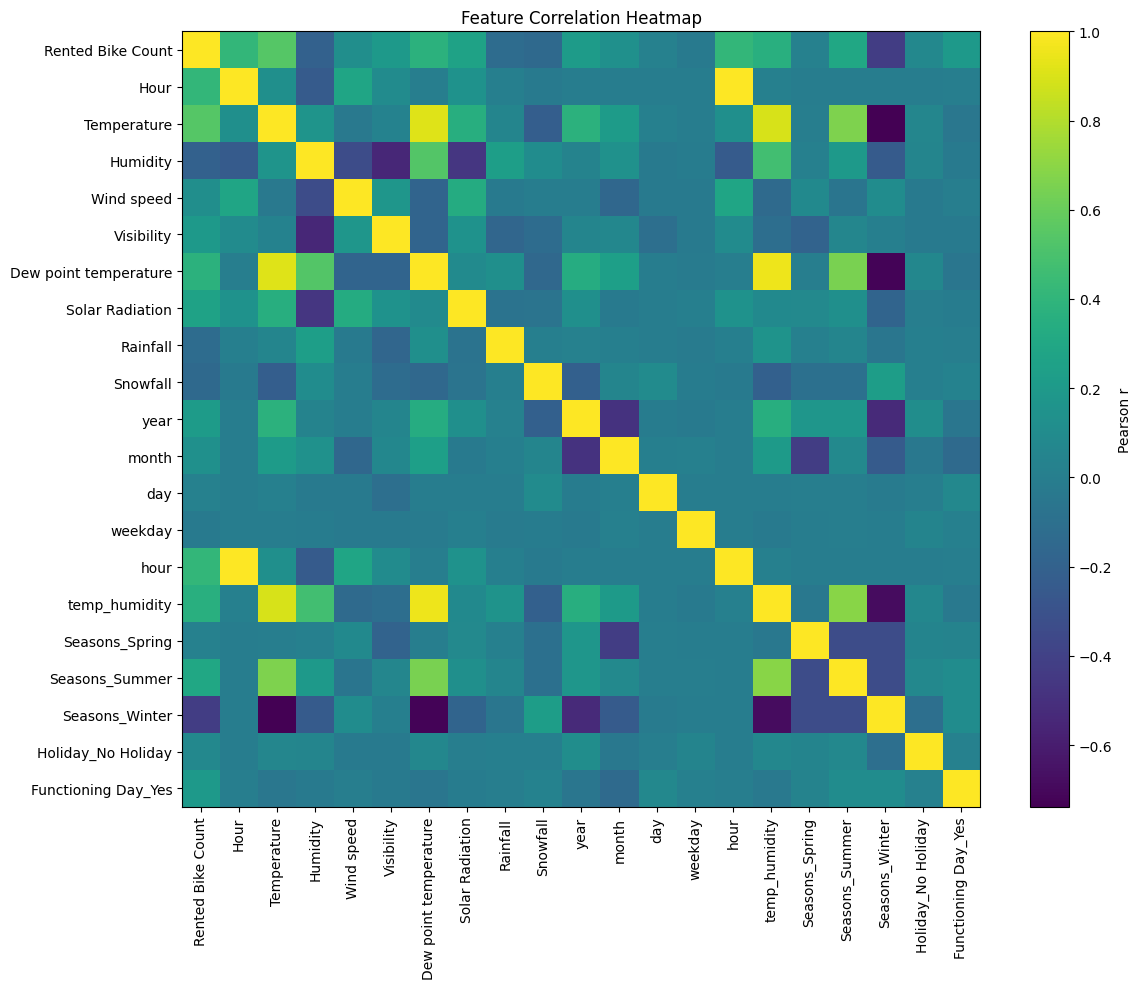

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load your feature file
df = pd.read_csv("bike_rental_features.csv")

# 2) Keep only numeric (and boolean) columns
df_num = df.select_dtypes(include=['number', 'bool'])

# 3) Compute the Pearson correlation matrix
corr = df_num.corr()

# 4) Plot it
plt.figure(figsize=(12, 10))
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.colorbar(label='Pearson r')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()



In [ ]:
# Task 2: Model building (75 mins)

# Implement various regression models including: 
# Linear Regression
# Ridge Regression (L2 Regularization)
# Lasso Regression (L1 Regularization)
# Elastic Net Regression
#  Perform hyperparameter tuning using GridSearchCV
# Evaluate model performance using: 
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# R-squared (R²)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# — Load and immediately drop any leftover date columns —
df = pd.read_csv("bike_rental_features.csv")
df.drop(columns=['Date', 'DateTime'], inplace=True, errors='ignore')

# — Now split into X (all numeric features) and y —
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# — Sanity check: should be all numeric —
print(X.dtypes.unique())   # should show only int64 or float64




[dtype('int64') dtype('float64') dtype('bool')]


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

models = {
    "Linear": (
        LinearRegression(),
        {}
    ),
    "Ridge": (
        Ridge(),
        {"alpha": [0.1, 1, 10, 50]}
    ),
    "Lasso": (
        Lasso(max_iter=20000),
        {"alpha": [0.01]}
    ),
    "ElasticNet": (
        ElasticNet(max_iter=20000),
        {"alpha": [0.1], "l1_ratio": [0.8]}
    ),
}


results = []
for name, (estimator, params) in models.items():
    gs = GridSearchCV(estimator, params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    gs.fit(X_train, y_train)
    y_pred = gs.best_estimator_.predict(X_test)
    results.append({
        "Model": name,
        "Best Params": gs.best_params_,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²":  r2_score(y_test, y_pred)
    })

import pandas as pd
print(pd.DataFrame(results).sort_values("MSE").to_string(index=False))


/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e+08, tolerance: 2.342e+05
  model = cd_fast.enet_coordinate_descent(
/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+08, tolerance: 2.339e+05
  model = cd_fast.enet_coordinate_descent(
/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

     Model                     Best Params        MAE           MSE       R²
     Lasso                 {'alpha': 0.01} 319.983260 186123.671164 0.553281
     Ridge                  {'alpha': 0.1} 319.992945 186128.843557 0.553269
    Linear                              {} 320.021067 186142.736099 0.553236
ElasticNet {'alpha': 0.1, 'l1_ratio': 0.8} 318.072207 189221.034052 0.545847


In [ ]:
# Task 3: Model building with polynomial features (45 mins)

# Create polynomial features for selected numerical columns
# Train models with polynomial features to capture non-linear relationships
# Compare results with linear models to assess improvements
# Save the best-performing model
     

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
# import warnings
# from sklearn.exceptions import LinAlgWarning, ConvergenceWarning

# — Load & prepare features —
df = pd.read_csv("bike_rental_features.csv")
df.drop(columns=['Date','DateTime'], inplace=True, errors='ignore')
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# — Train/test split —
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# — Pipeline: polynomial → scale → ridge —
pipe = Pipeline([
    ("poly",  PolynomialFeatures(include_bias=False)),
    ("scale", StandardScaler()),
    ("model", Ridge())
])

# — Grid: degree, alpha, and solver for stability —
param_grid = {
    "poly__degree": [1, 2, 3],
    "model__alpha": [0.1, 1, 10],
    "model__solver": ["lsqr", "sag"]
}

# — Suppress harmless warnings —
# warnings.filterwarnings("ignore", category=LinAlgWarning)
# warnings.filterwarnings("ignore", category=ConvergenceWarning)

# — Run grid search —
gs = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)
gs.fit(X_train, y_train)

# — Evaluate on test set —
best = gs.best_estimator_
y_pred = best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

# — Desired output —
print("Best params:", gs.best_params_)
print("Test MSE:", mse)
print("Test R²:", r2)




Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sheilamcgover

Best params: {'model__alpha': 10, 'model__solver': 'lsqr', 'poly__degree': 3}
Test MSE: 95662.24560267689
Test R²: 0.770399353348728


In [25]:
import joblib

# `best` is your GridSearchCV best_estimator_
joblib.dump(best, "best_bike_model_poly3.pkl")
print("Saved model to best_bike_model_poly3.pkl")


Saved model to best_bike_model_poly3.pkl


In [ ]:
#  Task 4: Model evaluation and validation (45 mins)

# Perform cross-validation techniques to validate model performance (on both models- With Polynomial Features and without Polynomial Features)
# Assess models using test data
# Compare results across different regression models
#       Task 5: Reporting and insights (30 mins)

# 1.    Summarize findings and key takeaways from the analysis
# 2.    Discuss feature importance and business implications
# 3.    Provide recommendations for further improvements

In [28]:
from sklearn.model_selection import KFold, cross_validate
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv = cross_validate(
    best,                # your best pipeline from GridSearchCV
    X, y,
    cv=kf,
    scoring=("neg_mean_squared_error", "r2"),
    n_jobs=-1
)

print("Shuffled CV MSE:", -np.mean(cv["test_neg_mean_squared_error"]))
print("Shuffled CV R²:", np.mean(cv["test_r2"]))



Shuffled CV MSE: 86781.19483124194
Shuffled CV R²: 0.7912857257518382


In [30]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)

cv_ts = cross_validate(
    best,                # your best pipeline
    X, y,
    cv=tscv,
    scoring=("neg_mean_squared_error", "r2"),
    n_jobs=-1
)

print("TimeSeriesSplit CV MSE:", -np.mean(cv_ts["test_neg_mean_squared_error"]))
print("TimeSeriesSplit CV R²:", np.mean(cv_ts["test_r2"]))


TimeSeriesSplit CV MSE: 172492724.87454045
TimeSeriesSplit CV R²: -598.7438003238894
